In [1]:
# Section 1: Data Exploration
import pandas as pd 

# Section 2: Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import plotly.express as px
from IPython.display import HTML, display, clear_output
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Section 3: Data Preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from scipy.sparse import csr_matrix 
from joblib import parallel_backend

# Section 4: Model Building
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB 
from xgboost import XGBClassifier 
from sklearn.metrics import confusion_matrix

# Section 5: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Section 6: Interactive Widgets and Display
from ipywidgets import widgets, interact
from tkinter import messagebox

In [2]:
df = pd.read_csv("/kaggle/input/sarcasm/train-balanced-sarcasm.csv")

# Section 1: Data Exploration.

In [3]:
# Analyzing the data deeply to know actual memory usage.
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 588.1 MB


In [4]:
df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [5]:
df.shape

(1010826, 10)

In [6]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [7]:
df.tail()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...
1010825,1,"values, as in capitalism .. there is good mone...",frogking,politics,2,2,0,2009-01,2009-01-24 06:20:14,Why do the people who make our laws seem unabl...


# Section 2: Data Visualization

In [8]:
# Visualization 1: Label Distribution Bar Chart
sentiment_counts = df['label'].value_counts().reset_index(name='count')
fig = px.bar(sentiment_counts, x=sentiment_counts.index, y='count', title='Sentiment Distribution',labels={'x': 'Sentiment', 'count': 'Count'}, color='count',color_continuous_scale='Viridis')
fig.show()

In [9]:
# Visualization 2: 3d Top Ten Subreddits pie Chart

# Get top 10 subreddits
top_subreddits = df['subreddit'].value_counts()[:10]
# Create 3D pie chart
fig = px.pie(names=top_subreddits.index, values=top_subreddits.values, title='Top 10 Subreddits Distribution')
# Set layout for a 3D pie chart
fig.update_layout(scene=dict(aspectmode="data"))
# Show the 3D pie chart
fig.show()

In [10]:
# Sample a fraction of the data
sampled_df = df.sample(frac=0.001)

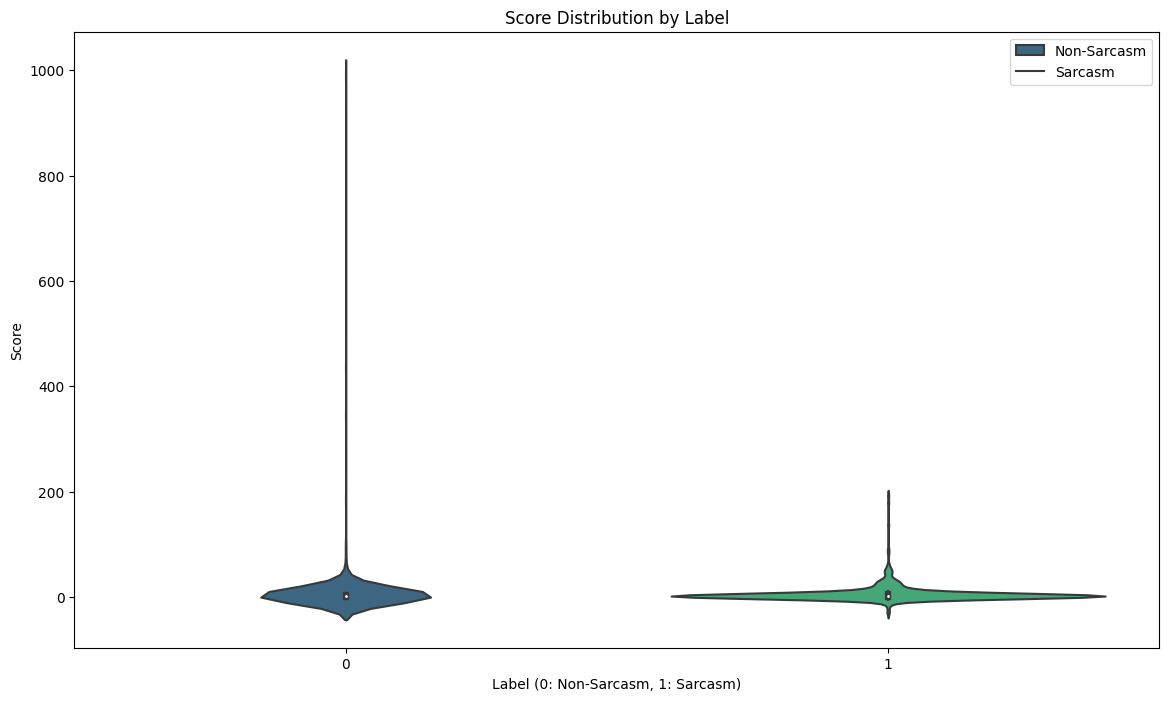

In [11]:
 #Visualization 3: Score Distribution Violin Plot with Key
plt.figure(figsize=(14, 8))
sns.violinplot(x='label', y='score', data=sampled_df, palette='viridis')
plt.title('Score Distribution by Label')
plt.xlabel('Label (0: Non-Sarcasm, 1: Sarcasm)')
plt.ylabel('Score')
plt.legend(loc='upper right', labels=['Non-Sarcasm', 'Sarcasm'])
plt.show()

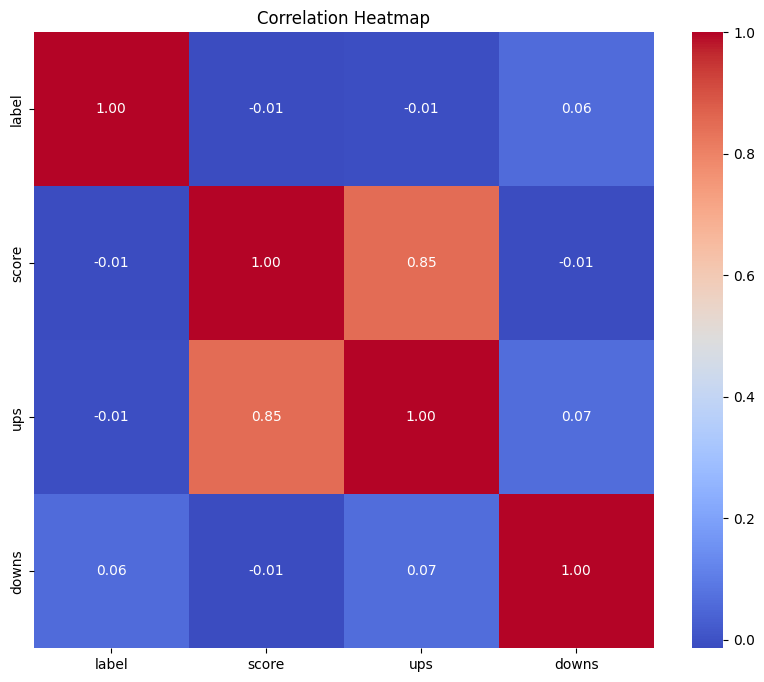

In [12]:
# Visualization 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['label', 'score', 'ups', 'downs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

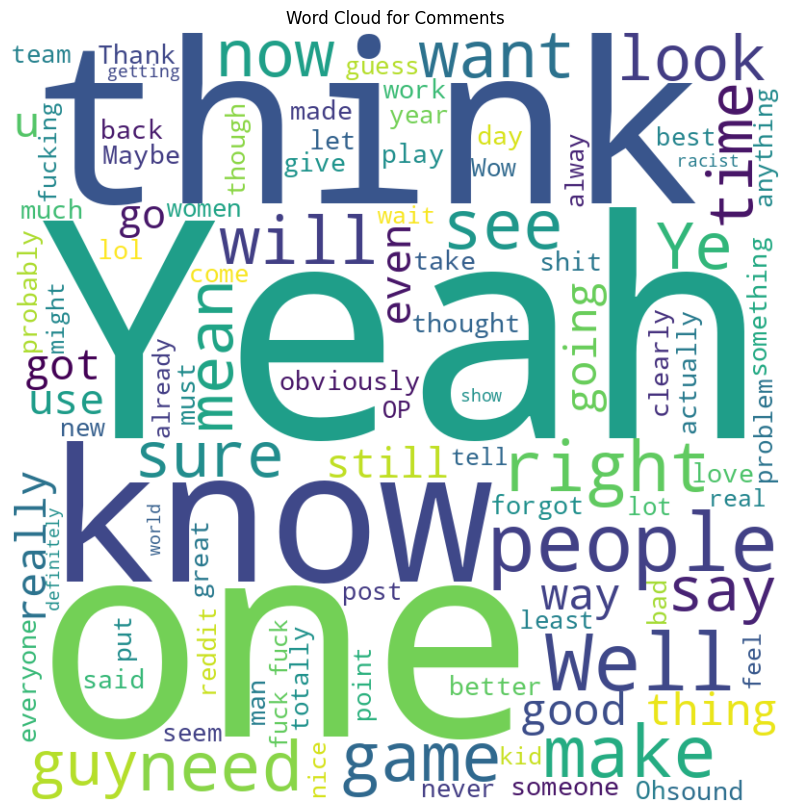

In [13]:
# Visualization 5: Word Cloud for Comments
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800,background_color='white',max_words=100).generate(' '.join(df['comment'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

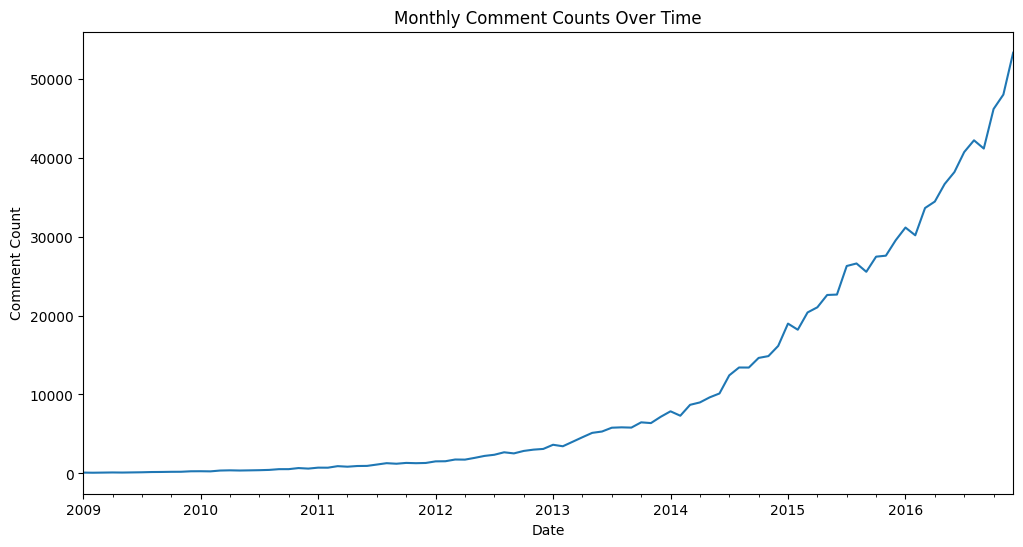

In [14]:
# Visualization 5: Time Series Analysis
df['date'] = pd.to_datetime(df['date'])
time_series_df = df.set_index('date')
plt.figure(figsize=(12, 6))
time_series_df.resample('M').size().plot(legend=False)
plt.title('Monthly Comment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.show()

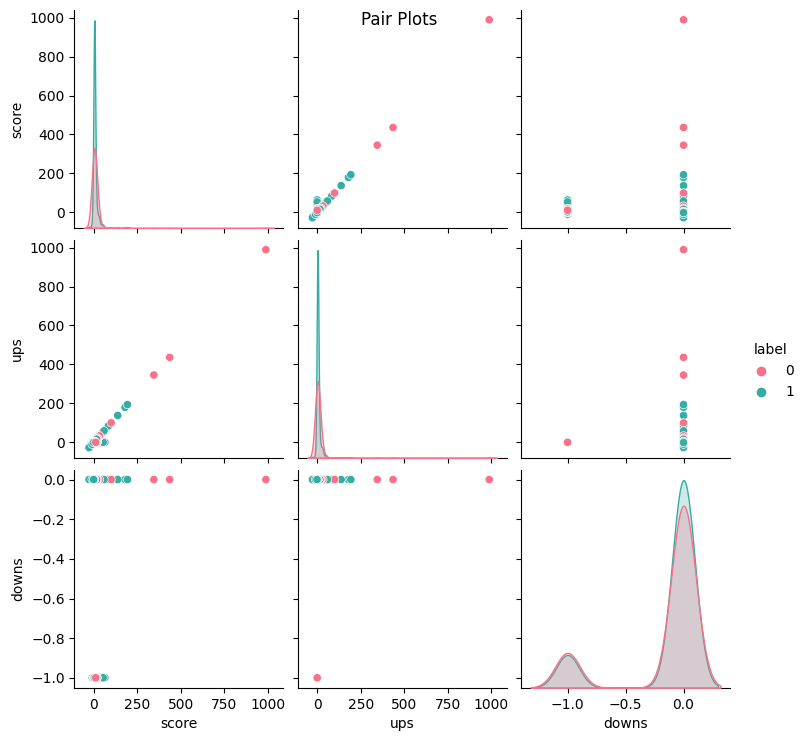

In [15]:
# Visualization 6: Pair Plots
sns.pairplot(sampled_df[['label', 'score', 'ups', 'downs']], hue='label', palette='husl')
plt.suptitle('Pair Plots')
plt.show()

In [16]:
# Visualization 7: 3D Interactive Score Scatter plot.
fig = px.scatter_3d(sampled_df, x='score', y='ups', z='downs', color='label', opacity=0.5, size_max=5)
fig.update_layout(scene=dict(xaxis_title='Score', yaxis_title='Ups', zaxis_title='Downs'))
fig.show()

# Section 3: Data Preprocessing

In [17]:
# Calculate subreddit statistics
subreddit_counts = df['subreddit'].value_counts()
subreddit_percentages = (subreddit_counts / len(df)) * 100
subreddit_stats = pd.DataFrame({
    'Subreddit': subreddit_counts.index,
    'Comment Count': subreddit_counts.values,
    'Percentage': subreddit_percentages.values
})
print(subreddit_stats)

                   Subreddit  Comment Count  Percentage
0                  AskReddit          65677    6.497360
1                   politics          39496    3.907300
2                  worldnews          26377    2.609450
3            leagueoflegends          21037    2.081169
4               pcmasterrace          18988    1.878464
...                      ...            ...         ...
14873                LabiaGW              1    0.000099
14874               Expected              1    0.000099
14875  AnimalsStoppingFights              1    0.000099
14876  panderingfromtheright              1    0.000099
14877               Pandemic              1    0.000099

[14878 rows x 3 columns]


In [18]:
# Drops cells with no data in them form the column 'comment'.
df = df.dropna(subset=['comment'])

In [19]:
# Training 80% of the data and testing 20% of the data
train_data, test_data, train_labels, test_labels = train_test_split(df['comment'], df['label'], test_size=0.2, random_state=42)

In [20]:
# Convert comments to a bag-of-words representation
vectorizer = CountVectorizer(max_features=5000, min_df=2, max_df=0.95)

# Using parallel computing with threading and utilizing all available CPU cores
with parallel_backend('threading', n_jobs=-1):
    # Fit and transform the training data into a bag-of-words representation
    train_features = vectorizer.fit_transform(train_data)
    # Transform the test data into the same bag-of-words representation
    test_features = vectorizer.transform(test_data)


In [21]:
# Use a subset for training
subset_size = 30000
train_features_subset = csr_matrix(train_features[:subset_size])
train_labels_subset = train_labels[:subset_size]

# Section 4: Model Building

In [22]:
# Define classifiers.
classifiers = {
    # using 5 classifiers to compare results and accuracies.
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM RBF Kernel': SVC(kernel='rbf', random_state=42)
}

In [23]:
# Lists to store classifier names and corresponding accuracy scores
classifier_names = []
accuracy_scores = []

In [24]:

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"\nTraining and evaluating {name}...")
    classifier.fit(train_features_subset, train_labels_subset)
    predictions = classifier.predict(test_features)
    
    # Evaluate the model
    accuracy = accuracy_score(test_labels, predictions)
    
    # Store classifier name and accuracy score
    classifier_names.append(name)
    accuracy_scores.append(accuracy)
    
    # Print the results
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:')
    print(classification_report(test_labels, predictions))


Training and evaluating Random Forest...
Random Forest Accuracy: 0.65
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66    101016
           1       0.66      0.62      0.64    101139

    accuracy                           0.65    202155
   macro avg       0.65      0.65      0.65    202155
weighted avg       0.65      0.65      0.65    202155


Training and evaluating SVM...
SVM Accuracy: 0.65
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.68    101016
           1       0.68      0.58      0.63    101139

    accuracy                           0.65    202155
   macro avg       0.66      0.65      0.65    202155
weighted avg       0.66      0.65      0.65    202155


Training and evaluating Multinomial Naive Bayes...
Multinomial Naive Bayes Accuracy: 0.64
Multinomial Naive Bayes Classification Report:
              precisio

# Section 5: Model Evaluation

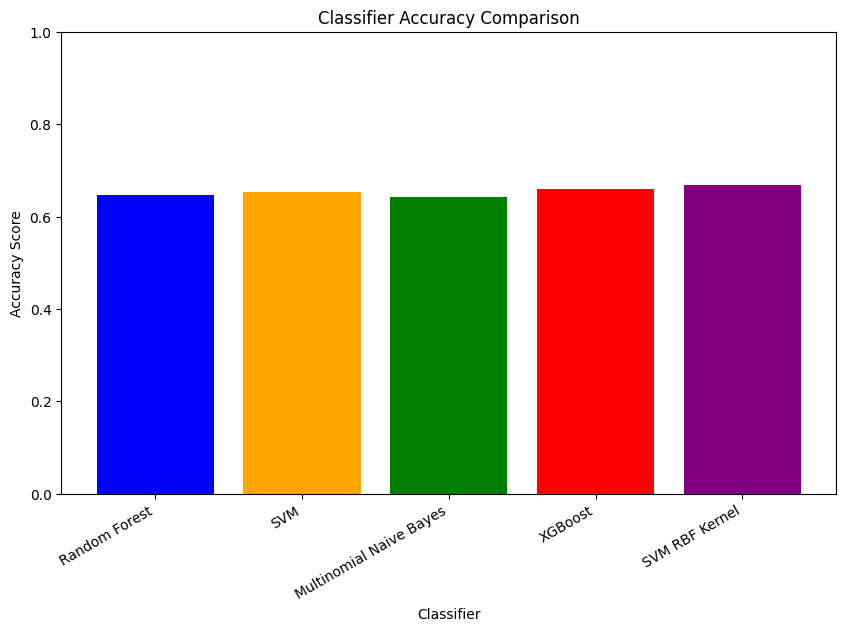

In [25]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'gray'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy scores
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [26]:
"""
Parameters:
- y_true: True labels of the data.
- y_pred: Predicted labels of the data.
- labels: List of class labels.
- classifier_name: Name of the classifier for plot title.
"""
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, classifier_name):
   
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Plot confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    
    # Set plot title, labels, and display the plot
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


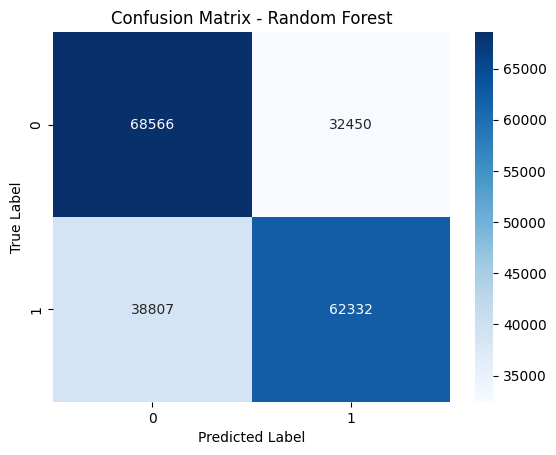

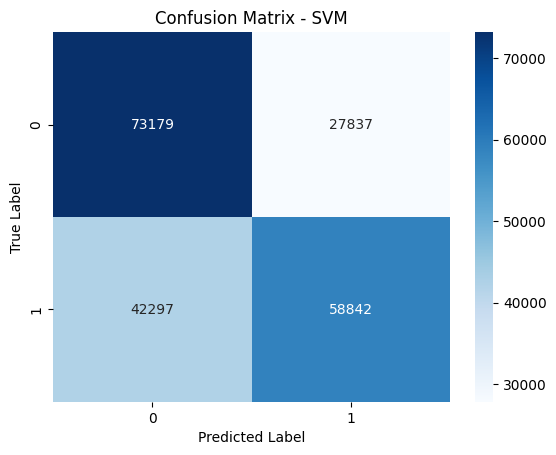

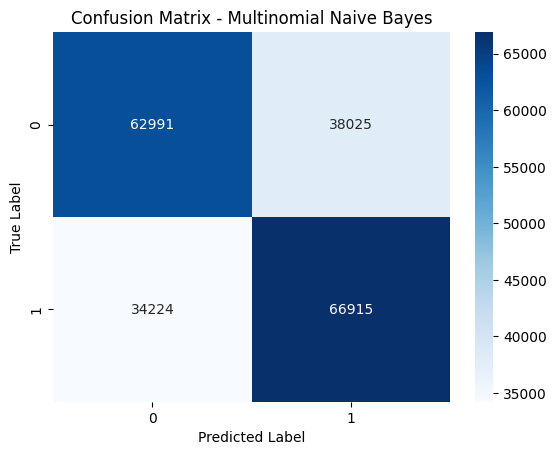

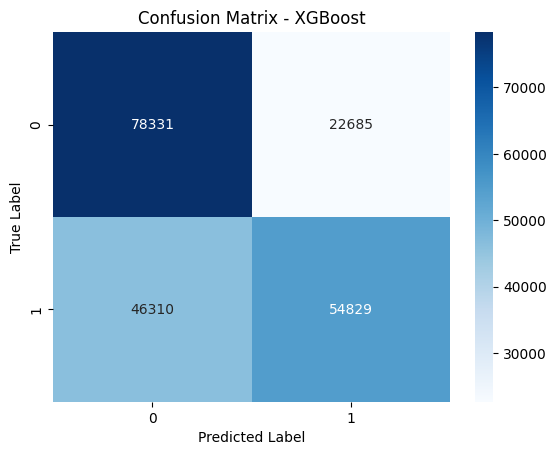

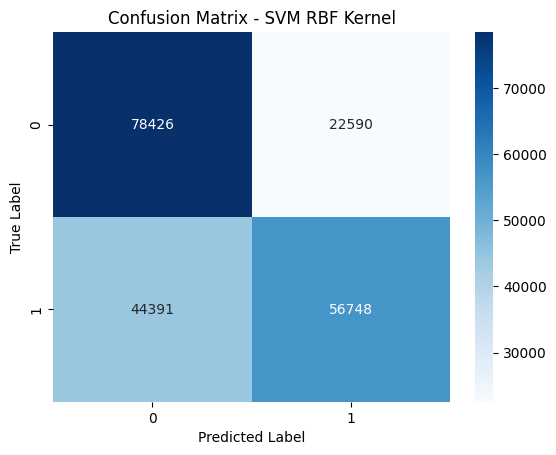

In [27]:
# Loop through classifiers and plot confusion matrices
for name, classifier in classifiers.items():
    # Train the classifier on the subset of training data
    classifier.fit(train_features_subset, train_labels_subset)
    # Make predictions on the test data
    predictions = classifier.predict(test_features)
    # Plot confusion matrix for the current classifier
    plot_confusion_matrix(test_labels, predictions, labels=[0, 1], classifier_name=name)


# Section 6: Interactive Widgets and Display

In [28]:
# Function to handle the button click and perform analysis
def analyze_comment(btn):
    comment_text = comment_input.value.strip()
    if not comment_text:
        with output:
            clear_output(wait=True)
            display(HTML("<h2>- Please Enter A Comment Before Analyzing -</h2>"))
        return
    
    # Dictionary to store predictions for each classifier
    predictions_dict = {}
       
    # Loop through each classifier
    for name, classifier in classifiers.items():
        # Convert the user input to features
        user_input_features = vectorizer.transform([comment_text])
        # Make predictions
        predictions = classifier.predict(user_input_features)
        # Map binary predictions to labels
        prediction_labels = {0: 'Non-Sarcastic', 1: 'Sarcastic'}
        predicted_label = prediction_labels[predictions[0]]
        # Store the predictions in the dictionary
        predictions_dict[name] = predicted_label
    
    # Count the number of "Sarcastic" and "Non-Sarcastic" predictions
    sarcasm_count = sum(1 for label in predictions_dict.values() if label == 'Sarcastic')
    non_sarcasm_count = sum(1 for label in predictions_dict.values() if label == 'Non-Sarcastic')
    
    # Determine the majority prediction
    majority_prediction = 'Sarcastic' if sarcasm_count > non_sarcasm_count else 'Non-Sarcastic'
    
    # Display the result as an ordered list using HTML library.
    with output:
        clear_output(wait=True)
        display(HTML("<div style='text-align: center;'>"))
        display(HTML("<h2>Predictions:</h2>"))
        display(HTML("<ol>"))  # Start ordered list
        for name, prediction in predictions_dict.items():
            display(HTML(f"<li>{name}: {prediction}</li>"))
        display(HTML("</ol>"))  # End ordered list
        
        # Display the majority prediction
        display(HTML(f"<p><b>Majority Prediction:<b> {majority_prediction}</p>"))
        display(HTML("</div>"))

In [29]:
# Create input widget
comment_input = widgets.Textarea(value='', placeholder='Enter comment...', description='Comment:')
# Create button widget
analyze_button = widgets.Button(description='Analyze')
analyze_button.on_click(analyze_comment)

In [30]:
# styles
comment_input.style = {'description_width': 'initial'}
comment_input.layout = widgets.Layout(width='40%', height='60px')
analyze_button.style.button_color = 'lightblue'
analyze_button.layout.margin = '35px'

In [31]:
# Output widget to display the result
box = widgets.HBox([comment_input, analyze_button])
display(box)
output = widgets.Output()
display(output)

Output()